Loading Dataset and Removing unnecessary columns


In [86]:
import pandas as pd

data = pd.read_csv('/Users/aatif/Stock_Prediction/Nifty 50 (2023-2024).csv')
data.head(5)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,23-OCT-2023,19521.60,19556.85,19257.85,19281.75,176044288.0,16212.90
1,25-OCT-2023,19286.45,19347.30,19074.15,19122.15,225291741.0,19818.32
2,26-OCT-2023,19027.25,19041.70,18837.85,18857.25,300356469.0,28939.64
3,27-OCT-2023,18928.75,19076.15,18926.65,19047.25,205201044.0,19947.48
4,30-OCT-2023,19053.40,19158.50,18940.00,19140.90,180132492.0,17095.73


In [87]:
data.shape

(248, 7)

In [88]:
data.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [89]:
data = data.drop(columns=['Shares Traded ','Turnover (₹ Cr)'],axis=1)

In [90]:
data.head(5)

,Date,Open,High,Low,Close
0,23-OCT-2023,19521.60,19556.85,19257.85,19281.75
1,25-OCT-2023,19286.45,19347.30,19074.15,19122.15
2,26-OCT-2023,19027.25,19041.70,18837.85,18857.25
3,27-OCT-2023,18928.75,19076.15,18926.65,19047.25
4,30-OCT-2023,19053.40,19158.50,18940.00,19140.90


In [91]:
data['Date '] = pd.to_datetime(data['Date '])

/var/folders/b8/h9d4pwdn4vz_f4wbfkf9gpg40000gn/T/ipykernel_45522/2419757259.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date '] = pd.to_datetime(data['Date '])


In [92]:
data.head(5)

,Date,Open,High,Low,Close
0,2023-10-23,19521.60,19556.85,19257.85,19281.75
1,2023-10-25,19286.45,19347.30,19074.15,19122.15
2,2023-10-26,19027.25,19041.70,18837.85,18857.25
3,2023-10-27,18928.75,19076.15,18926.65,19047.25
4,2023-10-30,19053.40,19158.50,18940.00,19140.90


In [93]:
data = data.reset_index()['Close ']

In [95]:
data

0      19281.75
1      19122.15
2      18857.25
3      19047.25
4      19140.90
         ...   
243    25057.35
244    24971.30
245    24749.85
246    24854.05
247    24781.10
Name: Close , Length: 248, dtype: float64

Text(0.5, 1.0, 'Closing price of Nifty 50 from Ooct 2023 - Oct 2024')

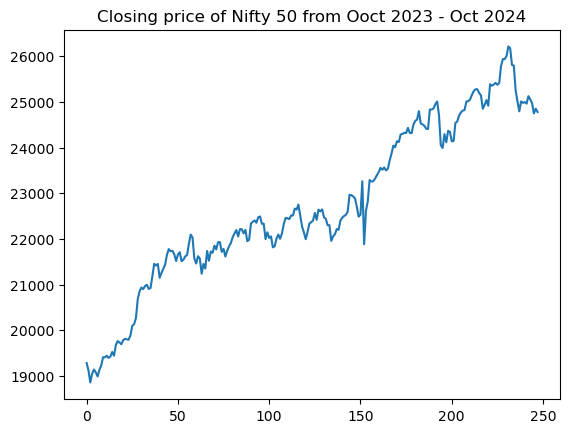

In [96]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.title("Closing price of Nifty 50 from Ooct 2023 - Oct 2024")

In [97]:
import numpy as np

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))


In [99]:
data

array([[0.05768604],
       [0.03599772],
       [0.        ],
       [0.02581943],
       [0.03854569],
       [0.03021552],
       [0.01792412],
       [0.03750612],
       [0.05073517],
       [0.07535196],
       [0.07466571],
       [0.07966652],
       [0.07311654],
       [0.07720009],
       [0.09081644],
       [0.07967332],
       [0.11118661],
       [0.12338289],
       [0.11884411],
       [0.1137074 ],
       [0.12585612],
       [0.12972224],
       [0.1283837 ],
       [0.12739169],
       [0.14030141],
       [0.16841741],
       [0.17338425],
       [0.19169566],
       [0.2486207 ],
       [0.27149128],
       [0.28271593],
       [0.27774909],
       [0.2870237 ],
       [0.2907879 ],
       [0.27846252],
       [0.28117356],
       [0.3160094 ],
       [0.35323694],
       [0.34807306],
       [0.35275453],
       [0.31158613],
       [0.32584117],
       [0.33866255],
       [0.3511578 ],
       [0.38015709],
       [0.39700087],
       [0.39057319],
       [0.392

In [143]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [144]:
train_data = data[:training_size]
test_data = data[training_size:]

In [145]:
train_data.shape,test_data.shape

((161, 1), (87, 1))

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional

In [147]:
def create_matrix(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        datax.append(dataset[i:(i+time_step),0])
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [161]:
time_step=1
x_train,y_train = create_matrix(train_data,time_step)
x_test,y_test = create_matrix(test_data,time_step)

In [162]:
x_train.shape,y_train.shape

((159, 1), (159,))

In [163]:
x_test.shape,y_test.shape

((85, 1), (85,))

In [164]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [165]:
model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(1,1))))
model.add(Bidirectional(LSTM(25,return_sequences=True)))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [166]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=8,verbose=1)

Epoch 1/100


2024-10-21 18:48:02.371243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:02.721578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:02.734551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:02.881098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:02.893950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:03.036046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:03.123577: I tensorflow/core/grappler/optimizers/cust

20/20 [==============================] - ETA: 0s - loss: 0.1395

2024-10-21 18:48:04.942327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:05.056721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:05.065284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:05.100057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:05.109135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:05.153385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 5s 96ms/step - loss: 0.1395 - val_loss: 0.5053
Epoch 2/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0693 - val_loss: 0.1833
Epoch 3/100
20/20 [==============================] - 0s 19ms/step - loss: 0.0139 - val_loss: 0.0483
Epoch 4/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0095 - val_loss: 0.0654
Epoch 5/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0083 - val_loss: 0.0431
Epoch 6/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0064 - val_loss: 0.0202
Epoch 7/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0048 - val_loss: 0.0081
Epoch 8/100
20/20 [==============================] - 0s 18ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 9/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0023 - val_loss: 0.0041
Epoch 10/100
20/20 [==============================] - 0s 19ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 11/10

In [167]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

2024-10-21 18:48:42.139181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:42.259823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:42.268803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:42.320666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-21 18:48:42.329726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 18ms/step


2024-10-21 18:48:42.391844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


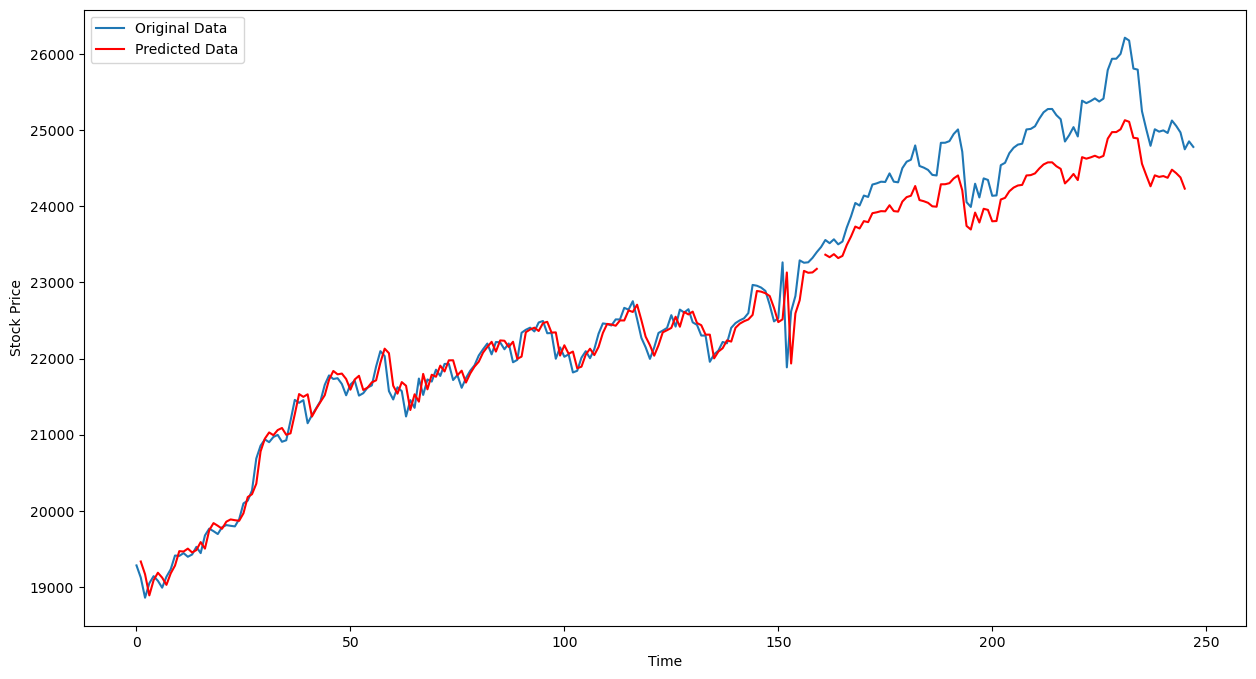

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_predict, test_predict, train_data, and test_data are already defined
# train_predict and test_predict are predictions after inverse_transform

# Create an empty array of the same shape as the original data for plotting predictions
predictions_plot = np.empty_like(data)
predictions_plot[:, :] = np.nan  # Fill with NaN initially

# Assign train predictions to their respective positions, considering the time step offset
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
predictions_plot[train_start_index:train_end_index, :] = train_predict

# Assign test predictions to their respective positions, considering the offset
test_start_index = train_end_index + time_step
test_end_index = test_start_index + len(test_predict)
predictions_plot[test_start_index:test_end_index, :] = test_predict

# Plotting the original data along with train and test predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(data), label='Original Data')  # Plot the original data (inverse transformed)
plt.plot(predictions_plot, label='Predicted Data', color='r')  # Plot the combined predictions (train and test)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [168]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [169]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error
math.sqrt(mean_absolute_error(y_train,train_predict))

147.08841959279863

In [170]:
math.sqrt(mean_squared_error(y_test,test_predict))

24226.454255438333

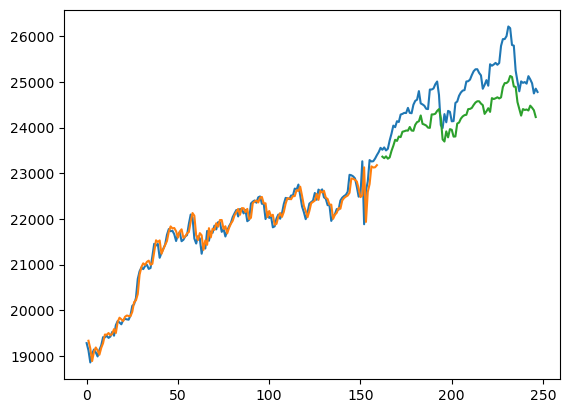

In [172]:
look_back=1
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()